<a href="https://colab.research.google.com/github/lucy4Git/Bill-Managing-Agent/blob/main/Twitter_Sentiment_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 242689917 - Aziz-Niyi NOI (Twitter Sentiment Analysis with LSMT, Random Forest, & Naive BayesModels)

**Steps to Follow**

1. Load Data and Import Libraries
2. Text Cleaning
3. Merge Tags with Questions
4. Dataset Preparation
5. Text Representation
6. Model Building
        Define Model Architecture
        Train the Model
7. Model Predictions
8. Model Evaluation



# Load Data and Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.regularizers import l2

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

import spacy

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# extract data from the ZIP file
#from google.colab import drive
#drive.mount('/content/drive')
!unzip '/content/drive/MyDrive/GA1/Twitter Sentiment Analysis .zip'

Archive:  /content/drive/MyDrive/GA1/Twitter Sentiment Analysis .zip
  inflating: twitter_training.csv    
  inflating: twitter_validation.csv  


In [ ]:
#Reading dataset
df_train = pd.read_csv('twitter_training.csv')
df_test = pd.read_csv("twitter_validation.csv")

# Data Exploration

In [ ]:
df_train.columns = ['Header1', 'company','labels','text']
df_train.head()

,Header1,company,labels,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
df_test.columns = ['Header1', 'company','labels','text']
df_test.tail()

,Header1,company,labels,text
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
998,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [ ]:
df_test.columns = ['Header1', 'company','labels','text']
df_test.head()

,Header1,company,labels,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [ ]:
df_test.tail()

,Header1,company,labels,text
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
998,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [ ]:
df_train.shape

(74681, 4)

In [ ]:
df_test.shape

(999, 4)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Header1  74681 non-null  int64 
 1   company  74681 non-null  object
 2   labels   74681 non-null  object
 3   text     73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
df_train['labels'].value_counts()

,count
labels,
Negative,22542
Positive,20831
Neutral,18318
Irrelevant,12990


In [ ]:
df_train.duplicated().sum()

2700

In [ ]:
df_train.isnull().sum()

,0
Header1,0
company,0
labels,0
text,686


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Header1  999 non-null    int64 
 1   company  999 non-null    object
 2   labels   999 non-null    object
 3   text     999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


In [ ]:
df_test.duplicated().sum()

0

In [ ]:
df_test.isnull().sum()

,0
Header1,0
company,0
labels,0
text,0


Texting cleaning

In [ ]:
df_train.dropna(inplace=True)

In [ ]:
df_train.drop_duplicates(inplace=True)

In [ ]:
df_train.duplicated().sum()

0

In [ ]:
#Drop columns that may not be necessary
df_train.drop(columns=['Header1', 'company'], inplace=True)

df_test.drop(columns=['Header1', 'company'], inplace=True)

In [ ]:
df_train

,labels,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
74676,Positive,Just realized that the Windows partition of my...
74677,Positive,Just realized that my Mac window partition is ...
74678,Positive,Just realized the windows partition of my Mac ...
74679,Positive,Just realized between the windows partition of...


In [ ]:
df_test

,labels,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
994,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,Positive,Today sucked so it’s time to drink wine n play...
997,Positive,Bought a fraction of Microsoft today. Small wins.


#Data Preprocessing

In [ ]:
# Preprocess Function
nlp = spacy.load("en_core_web_sm")
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [ ]:
def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove special characters, numbers, and punctuations
    tweet = re.sub(r'\W', ' ', tweet)
    tweet = re.sub(r'\d', ' ', tweet)
    tweet = re.sub(r'\s+', ' ', tweet)
    tweet = tweet.strip()
    return tweet

In [ ]:
# Clean the training data
df_train['text'] = df_train['text'].apply(preprocess)

# Clean the test data
df_test['text'] = df_test['text'].apply(preprocess)

In [ ]:
df_train.head()

,labels,text
0,Positive,come border kill
1,Positive,m get borderland kill
2,Positive,m come borderland murder
3,Positive,m get borderland 2 murder
4,Positive,m get borderland murder


In [ ]:
df_test.head()

,labels,text
0,Neutral,BBC News Amazon boss Jeff Bezos reject claim c...
1,Negative,@microsoft pay word function poorly @samsungu ...
2,Negative,csgo matchmaking closet hacking truly awful game
3,Neutral,President slap Americans face commit unlawful ...
4,Negative,hi @eahelp Madeleine McCann cellar past 13 yea...


In [ ]:
df_train['text'] = df_train['text'].str.lower()
df_test['text'] = df_test['text'].str.lower()

In [ ]:
# Drop rows where 'OriginalTweet' is empty
df_train = df_train.dropna(subset=['text'])
df_test = df_test.dropna(subset=['text'])

# Alternatively, if there are rows with just whitespace, use this to remove them as well:
df_train = df_train[df_train['text'].str.strip() != '']
df_test = df_test[df_test['text'].str.strip() != '']

# Display the updated dataframe
df_train.head()

,labels,text
0,Positive,come border kill
1,Positive,m get borderland kill
2,Positive,m come borderland murder
3,Positive,m get borderland 2 murder
4,Positive,m get borderland murder


In [ ]:
df_train.duplicated().sum()

7021

In [ ]:
df_train = df_train.drop_duplicates(subset=['text'])
df_train.shape

(62698, 2)

Index(['labels', 'text'], dtype='object')


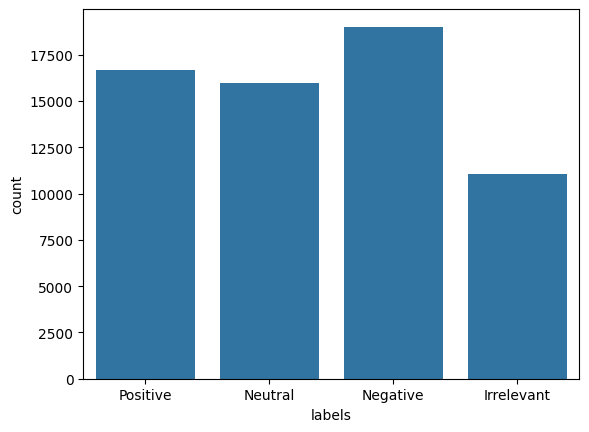

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the actual column names in your DataFrame
print(df_train.columns)

# Replace 'Sentiment' with the actual column name containing sentiment information
# Based on the Global variables provided, it's likely to be 'labels'
sns.countplot(x='labels', data=df_train)  # Changed 'Sentiment' to 'labels'
plt.show()

# Split data into train and test

In [ ]:
# Separate features and labels for training data
train_texts = df_train['text'].values
train_labels = df_train['labels'].values

# Separate features and labels for test data
test_texts = df_test['text'].values
test_labels = df_test['labels'].values



In [ ]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the labels
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

In [ ]:
# Initialize the tokenizer
tokenizer = Tokenizer()  # You can adjust the number of words

# Fit the tokenizer on the training texts
tokenizer.fit_on_texts(train_texts)
tokenizer.fit_on_texts(test_texts)

In [ ]:
# Convert texts to sequences
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

In [ ]:
# Maximum Length in X_train_sequences
maxlen = max(len(tokens) for tokens in train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 161


In [ ]:
train_padded = pad_sequences(train_sequences, maxlen=maxlen, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=maxlen, padding='post')

In [ ]:
# Embedding Input Size
input_size = np.max(train_padded) + 1
input_size

28552

# Models traning and Evaluation

# LSTM Model

In [ ]:
# Define the model
model = Sequential()

# Add an embedding layer
model.add(Embedding(input_dim=input_size, output_dim=100, input_shape=(56,)))

# Add a bidirectional LSTM layer with 128 units
model.add(Bidirectional(LSTM(128, kernel_regularizer=l2(0.1), return_sequences=True, recurrent_regularizer=l2(0.1))))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Add another LSTM layer
model.add(Bidirectional(LSTM(64, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01))))
# Add batch normalization layer
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Add a dense layer with 64 units and ReLU activation
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))

# Add dropout regularization
model.add(Dropout(0.5))

# Add the output layer with 5 units for 5 labels and sigmoid activation
model.add(Dense(5, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 56, 100)             │       2,855,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 56, 256)             │         234,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 56, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 56, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,264,165 (12.45 MB)

 Trainable params: 3,263,397 (12.45 MB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
Model: "sequential"

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_padded,
    train_labels_encoded ,
    validation_data=(test_padded,test_labels_encoded),
    epochs=10
)

Epoch 1/10
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 75s 33ms/step - accuracy: 0.4214 - loss: 9.1405 - val_accuracy: 0.8186 - val_loss: 0.6046
Epoch 2/10
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 77s 34ms/step - accuracy: 0.8076 - loss: 0.6611 - val_accuracy: 0.6804 - val_loss: 1.0564
Epoch 3/10
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.8581 - loss: 0.5221 - val_accuracy: 0.8918 - val_loss: 0.4261
Epoch 4/10
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 65s 33ms/step - accuracy: 0.8771 - loss: 0.4611 - val_accuracy: 0.8657 - val_loss: 0.4994
Epoch 5/10
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.8915 - loss: 0.4196 - val_accuracy: 0.8758 - val_loss: 0.4563
Epoch 6/10
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.8994 - loss: 0.3857 - val_accuracy: 0.9158 - val_loss: 0.3515
Epoch 7/10
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9104 - loss: 0.3702 - val_accuracy: 0.9409 - val_loss: 0.2808
Epoch 8/10
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9120 -

Model Evaluation

In [ ]:
test_loss, test_accuracy = model.evaluate(test_padded , test_labels_encoded)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9289 - loss: 0.3120
Test Loss: 0.2940681576728821
Test Accuracy: 0.9358717203140259


validation of Model

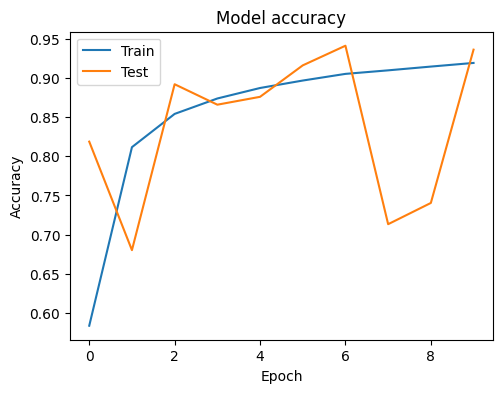

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

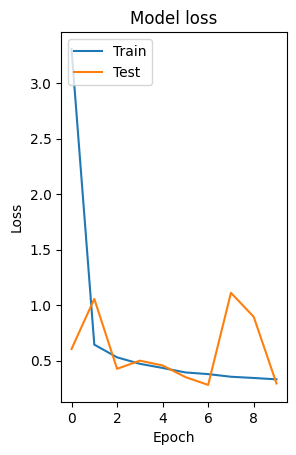

In [ ]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Naive Bayes

In [ ]:
# classifier
clf = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('naive_bayes', (MultinomialNB()))
])

In [ ]:
# Convert train_padded back to strings before fitting
train_padded_str = [' '.join(map(str, doc)) for doc in train_padded]

# classifier
clf = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('naive_bayes', (MultinomialNB()))
])

# Fit the classifier with train_padded_str (strings)
clf.fit(train_padded_str, train_labels_encoded)

Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('naive_bayes', MultinomialNB())])

In [ ]:
# Convert test_padded back to strings before predicting
test_padded_str = [' '.join(map(str, doc)) for doc in test_padded]

# Now predict using the string representation
y_pred = clf.predict(test_padded_str)

In [ ]:
print(accuracy_score(test_labels_encoded, y_pred))

0.8016032064128257


In [ ]:
print(classification_report(test_labels_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.64      0.77       171
           1       0.69      0.93      0.79       265
           2       0.90      0.73      0.80       285
           3       0.79      0.86      0.82       277

    accuracy                           0.80       998
   macro avg       0.84      0.79      0.80       998
weighted avg       0.83      0.80      0.80       998



# Random Forest

In [ ]:
clf = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('naive_bayes', (RandomForestClassifier()))
])

In [ ]:
# Convert train_padded back to strings before fitting
train_padded_str = [' '.join(map(str, doc)) for doc in train_padded]

# classifier
clf = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('naive_bayes', (RandomForestClassifier()))
])

# Fit the classifier with train_padded_str (strings)
clf.fit(train_padded_str, train_labels_encoded)

Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('naive_bayes', RandomForestClassifier())])

In [ ]:
# Convert test_padded back to strings before predicting
test_padded_str = [' '.join(map(str, doc)) for doc in test_padded]

# Now predict using the string representation
y_pred = clf.predict(test_padded_str)

In [ ]:
print(accuracy_score(test_labels_encoded, y_pred))

0.9539078156312625


In [ ]:
print(classification_report(test_labels_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       171
           1       0.96      0.97      0.96       265
           2       0.92      0.97      0.94       285
           3       0.97      0.95      0.96       277

    accuracy                           0.95       998
   macro avg       0.96      0.95      0.95       998
weighted avg       0.95      0.95      0.95       998

